In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("amz_uk_price_prediction_dataset.csv")

Part 1: Analyzing Best-Seller Trends Across Product Categories


1. Crosstab Analysis:

Create a crosstab between the product category and the isBestSeller status.

Are there categories where being a best-seller is more prevalent?

Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.

In [5]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [6]:
absolute_frequency=df.groupby("isBestSeller")["category"].get_group(True).value_counts().reset_index() #we select only best seller products

In [7]:
relative_frequency= df.groupby("isBestSeller")["category"].get_group(True).value_counts(normalize = True).reset_index()

In [8]:
df1=absolute_frequency.merge(relative_frequency, how='inner')

In [9]:
df1.rename(columns={"count": "absolute_frequency"}, inplace=True)
df1.rename(columns={"proportion": "relative_frequency"}, inplace=True)


In [10]:
df1_top10 = df1.sort_values(by="absolute_frequency" ,ascending = False).head(10)

In [11]:
#Option for crosstab to see the diference between what i did in df1 and here

crosstab_test = pd.crosstab(df["category"], df["isBestSeller"])


Using .crosstab() i'm having the same results that doing groupby. But it wont work for a chi-square calculation.

Are there categories where being a best-seller is more prevalent?
I understood in this question that we need to use only the variable isBestSeller on the stage of TRUE, since those are in fact the best sellers. I didn't use crosstab in this case because to analyze this we don't need those categories that are not best sellers(False). From this understanding, i did a table of absolute and relative frequency to plot.


For Statistical test, i used crosstab.

In [14]:
df1_top10 #we select only best seller products, the ones what is categorizd as isbestseller = true

,category,absolute_frequency,relative_frequency
0,Grocery,556,0.069674
1,Health & Personal Care,552,0.069173
2,Baby,341,0.042732
3,Sports & Outdoors,330,0.041353
4,Power & Hand Tools,306,0.038346
5,Beauty,302,0.037845
6,Pet Supplies,285,0.035714
7,Arts & Crafts,230,0.028822
8,Women,213,0.026692
9,Men,169,0.021178


Are there categories where being a best-seller is more prevalent?
So far, we can see that our top 5 is Grocery, Health and Personal care, Baby, Sport and outdoors and Power and hand tools. So yes, there's many categories where a best-seller is more prevalent. 

2. Statistical Tests:

Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
Compute Cramér's V to understand the strength of association between best-seller status and category.

In [17]:
from scipy.stats import chi2_contingency

In [18]:
chi2_stats, chi2_pvalue, _, _ = chi2_contingency(crosstab_test)

In [19]:
chi2_pvalue

0.0

P-value >= 0.05, indicates that there is not enough evidence to conclude a significant association between the variables.


In [21]:
from scipy.stats.contingency import association

In [22]:
association(crosstab_test, method='cramer')

0.1222829439760564

3. Visualizations:
Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc

In [25]:
crosstab_test.sort_values(by= True, ascending= False)

isBestSeller,False,True
category,,
Grocery,9008,556
Health & Personal Care,9017,552
Baby,14709,341
Sports & Outdoors,835935,330
Power & Hand Tools,8353,306
...,...,...
Downhill Ski Boots,1284,0
Digital Frames,774,0
Motorbike Chassis,107,0


In [26]:
filtered_crosstab = crosstab_test[crosstab_test[True] > crosstab_test[False]] #If i sort this crosstab is not giving me information, so, i gues that what this exercise is asking me is to use the relationship between true and false aand i'm going to do a relative freq of both to plot


In [27]:
filtered_crosstab

isBestSeller,False,True
category,,


In [28]:
relative_false = df[df['isBestSeller'] == False]['category'].value_counts(normalize=True)


In [29]:
relative_true = df[df['isBestSeller'] == True]['category'].value_counts(normalize=True)


In [30]:
df_category = df[["category"]].copy() #copy to plot

In [31]:
# I tried to merge, but when i try to extract this data, categories are just showing one by one and not by groups. Ask chatgpt to give me an example of how make groups and make easier to plot. Merge the normalized frequencies back into df_category. Since the category column in df_category and the indices of relative_false and relative_true are both based on category values, .map() will assign the corresponding value to each row based on the category column.
df_category['relative_false'] = df_category['category'].map(relative_false)
df_category['relative_true'] = df_category['category'].map(relative_true)
# Group by category and calculate the mean of relative_false and relative_true
category_grouped = df_category.groupby("category")[['relative_false', 'relative_true']].mean()

In [32]:
# Sort by relative_true, which are the best sellers, so we can analyze from that point
category_grouped_sorted = category_grouped.sort_values(by='relative_true', ascending=False)



In [36]:
pastel_palette = ['#A1C6EA', '#F28D35']

In [38]:
sns.color_palette(pastel_colors, 2)

[(0.6313725490196078, 0.7764705882352941, 0.9176470588235294),
 (0.9490196078431372, 0.5529411764705883, 0.20784313725490197)]

<Axes: xlabel='category'>

<Figure size 1200x800 with 0 Axes>

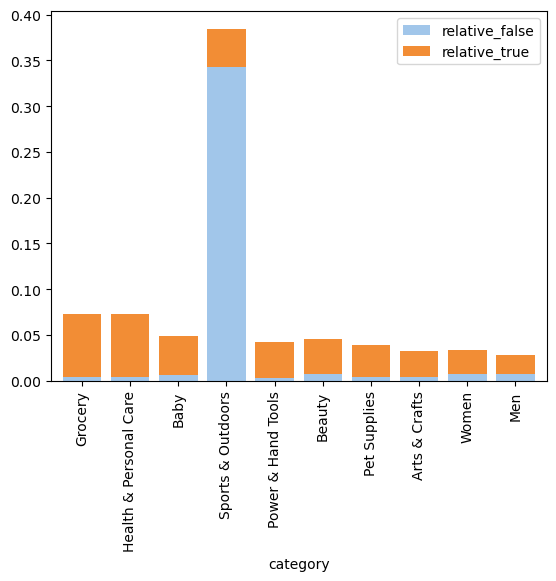

In [40]:
plt.figure(figsize=(12, 8))
category_grouped_sorted[['relative_false', 'relative_true']].head(10).plot(kind='bar', stacked=True, width=0.8, color=pastel_palette)


<Axes: xlabel='category'>

<Figure size 1200x800 with 0 Axes>

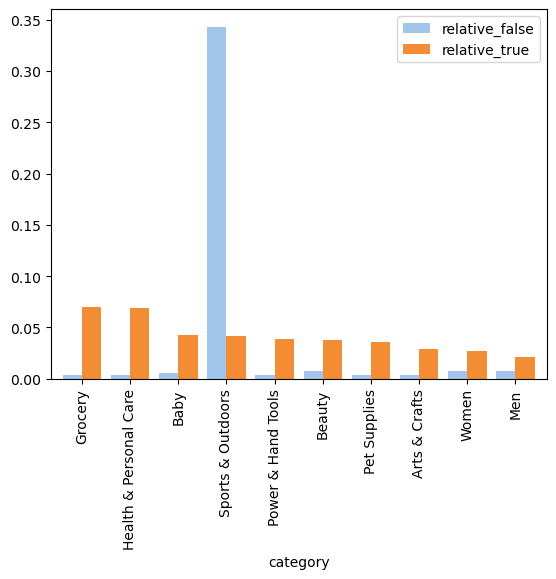

In [284]:
plt.figure(figsize=(12, 8))
category_grouped_sorted[['relative_false', 'relative_true']].head(10).plot(kind='bar', stacked=False, width=0.8, color=pastel_palette)


Watching this bar chart, we can understand the proportion of how much every category products are bestseller or not. So far, we can conlude with this top 10 of categories that: Grocery, Health&PC, Baby and Power&HTools have more products that are Best Sellers than products that are not. But we can do an observation about Sports&Outdoors that, even if they have a good proportion of products that are bestsellers, the amount of products that are not it's bigger according with this visualization.

Part 2: Exploring Product Prices and Ratings Across Categories and Brands 

Preliminary Step: Remove outliers in product prices.

For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.

Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.

In [44]:
df.shape

(2443651, 9)

In [46]:
def tukeys_test_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify the outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]

    return outliers, lower_bound, upper_bound

In [48]:
data_series = df['price']  # replace 'ColumnName' with your specific column
outliers, lower_bound, upper_bound = tukeys_test_outliers(data_series)

print("Outliers:", outliers)

Outliers: 10         139.00
19         164.99
25         149.99
28         289.00
31         199.99
            ...  
2443619    166.99
2443627    152.58
2443638    108.77
2443641    166.99
2443643    158.99
Name: price, Length: 327688, dtype: float64


In [50]:
df_sinoutliers = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]


In [52]:
df_sinoutliers.shape

(2115963, 9)

1. Violin Plots:
Use a violin plot to visualize the distribution of price across different product categories. Filter out the top 20 categories based on count for better visualization.
Which product category tends to have the highest median price? Don't filter here by top categories.

In [85]:
testtop20=df_sinoutliers.groupby("category")["price"].agg("median").sort_values(ascending = False).head(20) #Ploting this is giving me just lines?

In [120]:
testtop20.head() #in this case, the highest median is located in Desktop PCs

category
Desktop PCs       74.00
Boxing Shoes      69.79
Tablets           69.00
Graphics Cards    68.54
Motherboards      67.92
Name: price, dtype: float64

In [122]:
#Paula's solution for violin plot - but i don't see that the median price is included in this code. Works to plot

top20_1= df_sinoutliers["category"].value_counts().nlargest(20).index
top_20_cat = df_sinoutliers[df_sinoutliers["category"].isin(top20_1)]
top_20_cat.category.value_counts()

category
Sports & Outdoors                         694092
Beauty                                     19233
Bath & Body                                19050
Manicure & Pedicure Products               18904
Handmade Clothing, Shoes & Accessories     18811
Make-up                                    18718
Skin Care                                  18686
Hair Care                                  18625
Birthday Gifts                             18398
Handmade Gifts                             17948
Handmade Home Décor                        17675
Luggage and travel gear                    17557
Women                                      17476
Fragrances                                 17431
Handmade Kitchen & Dining                  17346
Handmade Artwork                           17269
Handmade Home & Kitchen Products           17175
Handmade Jewellery                         17135
Men                                        16596
Baby                                       14883
Name: count

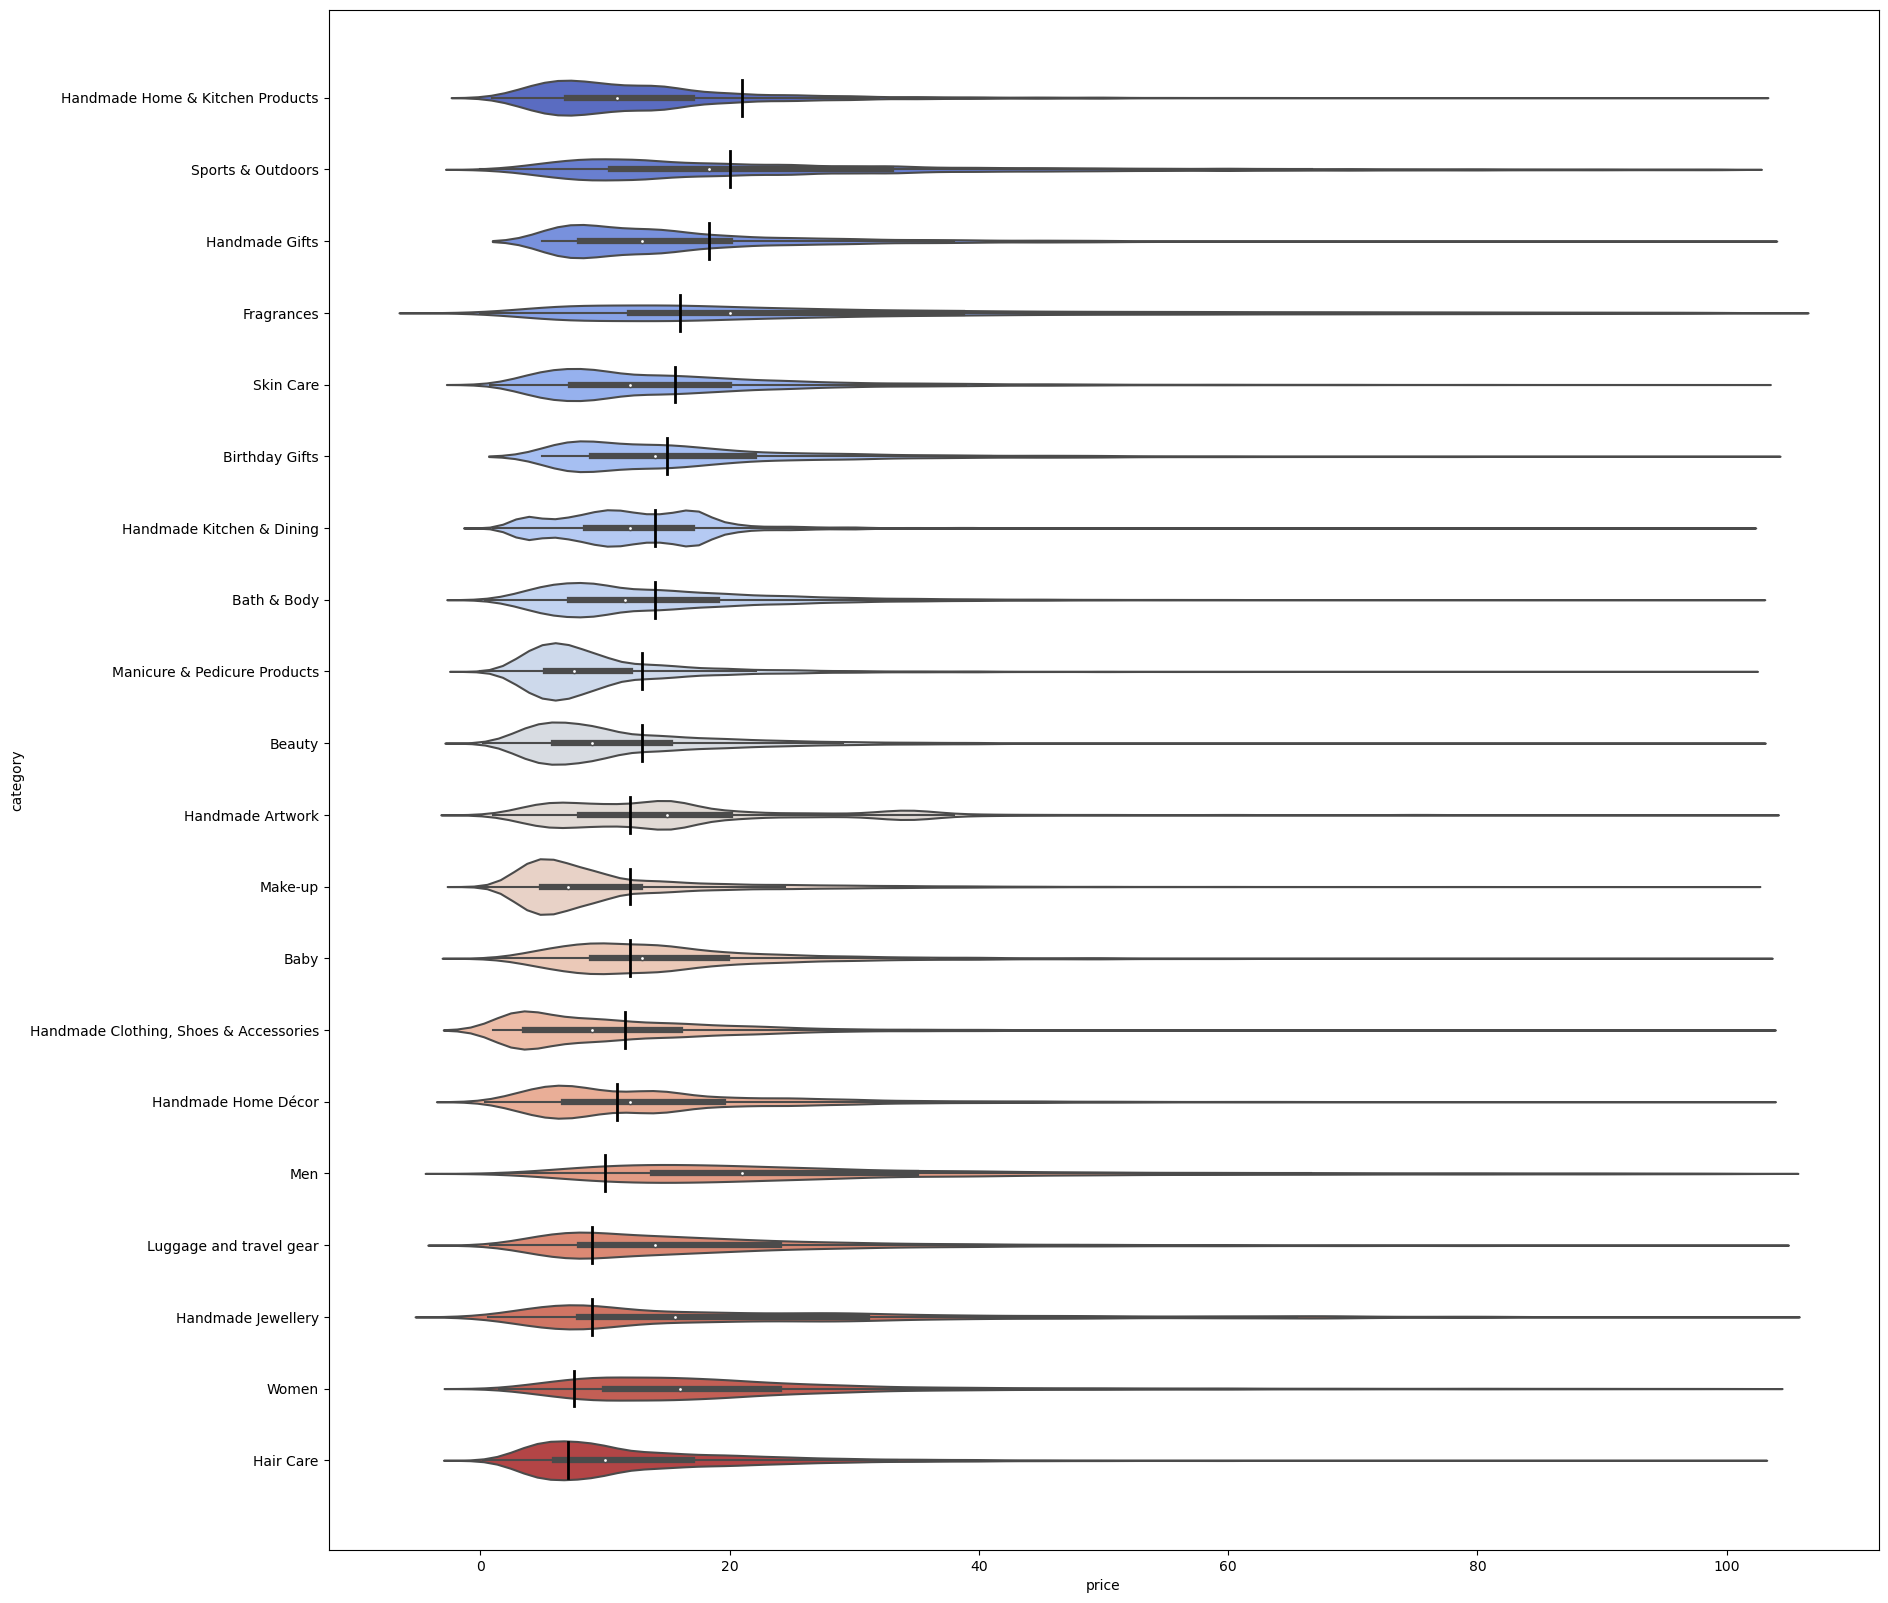

In [124]:
medians = top_20_cat.groupby('category')['price'].median().sort_values(ascending=False)
plt.figure(figsize=(20,20))
sns.violinplot(data=top_20_cat, x="price", y="category", palette="coolwarm")

#ask to chatgpt how i can add something to make it clear where is the median price of each category
for i, (category, median) in enumerate(medians.items()):
    # Get the position of the category in the y-axis
    plt.plot([median, median], [i - 0.25, i + 0.25], color='black', lw=2)  # Adjust the position for each category
plt.show()


#Doing this, i couldn't change the data, according to the first test: testtop20, the highest median price is located in Desktops PCs, but in this case i couldn't plot that in this graph. 

2. Bar Charts:
Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
Which product category commands the highest average price? Don't filter here by top categories.

In [296]:
category_counts_t10 = df["category"].value_counts().head(10).index
top_10_df = df[df["category"].isin(category_counts_t10)]
#i did this because is asking me first, based on count, to extract top 10 categories. And then, of this top ten, make an average of the product prices of this 10 categories

In [272]:
#calculate the average price for the top 10 categories
bar_plot = top_10_df.groupby("category")["price"].mean().sort_values(ascending=False).reset_index()


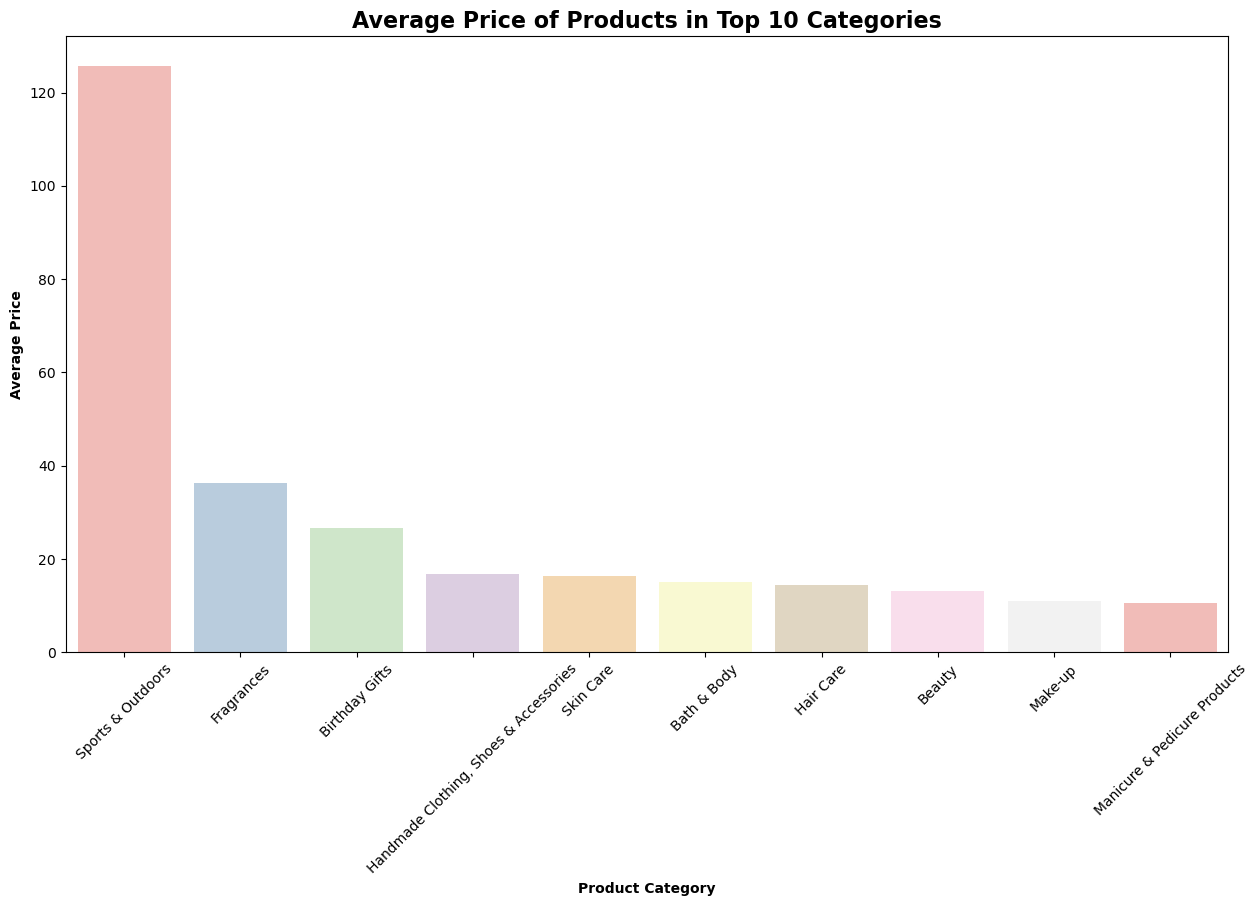

In [292]:
plt.figure(figsize=(15,8))
sns.barplot(data=bar_plot, x="category", y="price", palette="Pastel1")
plt.xlabel('Product Category', fontsize=10, weight='bold')
plt.ylabel('Average Price', fontsize=10, weight='bold')
plt.title('Average Price of Products in Top 10 Categories', fontsize=16, weight='bold')
plt.xticks(rotation=45)  # Rotate the x-axis labels for readability

plt.show()

3. Box Plots:
Visualize the distribution of product ratings based on their category using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

In [317]:
df_sinoutliers.groupby("category")["stars"].agg("median").sort_values(ascending = False).reset_index()

,category,stars
0,Computer Memory,4.7
1,Building & Construction Toys,4.6
2,Office Paper Products,4.6
3,Luxury Food & Drink,4.6
4,Kids' Play Figures,4.6
...,...,...
291,Hockey Shoes,0.0
292,Hi-Fi Receivers & Separates,0.0
293,Handmade Kitchen & Dining,0.0
294,Handmade Jewellery,0.0


Which category tends to receive the highest median rating from customers?

Computer memory has the highest median with 4,7 stars rating, but it's not in the group of top 10 categories. 

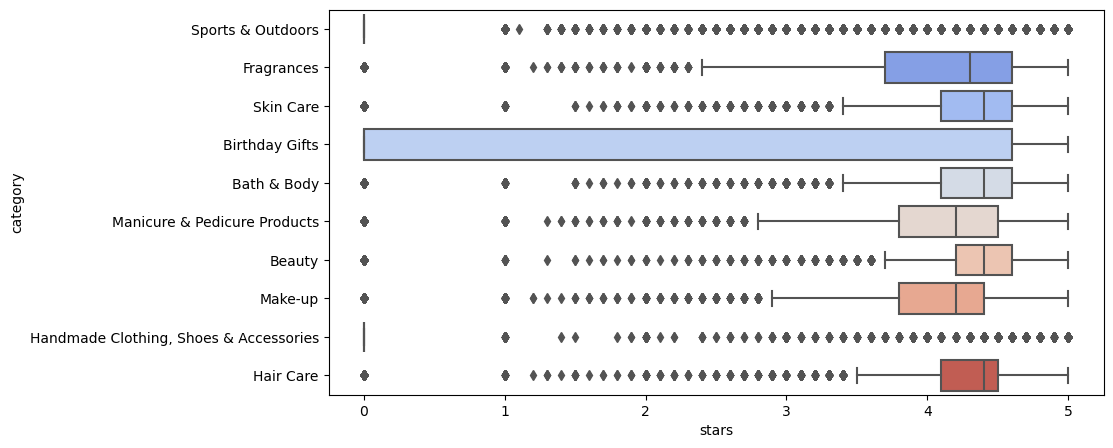

In [336]:
plt.figure(figsize=(10,5))

sns.boxplot(data=top_10_df, x="stars", y="category", palette="coolwarm") #Making this plot is difficult to see if i don't use the top 10.
plt.show()

Part 3: Investigating the Interplay Between Product Prices and Ratings

1. Correlation Coefficients:
Calculate the correlation coefficient between price and stars.
Is there a significant correlation between product price and its rating?

In [343]:
Pearson = df["price"].corr(df["stars"], method="pearson")

In [341]:
Spearman = df["price"].corr(df["stars"], method="spearman")

In [347]:
print(f"Pearson result: {Pearson}, shows a weak correlation between these variables")
print(f"Spearman result: {Spearman}")

Pearson result: -0.12490673262148386, shows a weak correlation between these variables
Spearman result: -0.13316425462433876


2. Visualizations:
Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
Use a correlation heatmap to visualize correlations between all numerical variables.
Examine if product prices typically follow a normal distribution using a QQ plot.

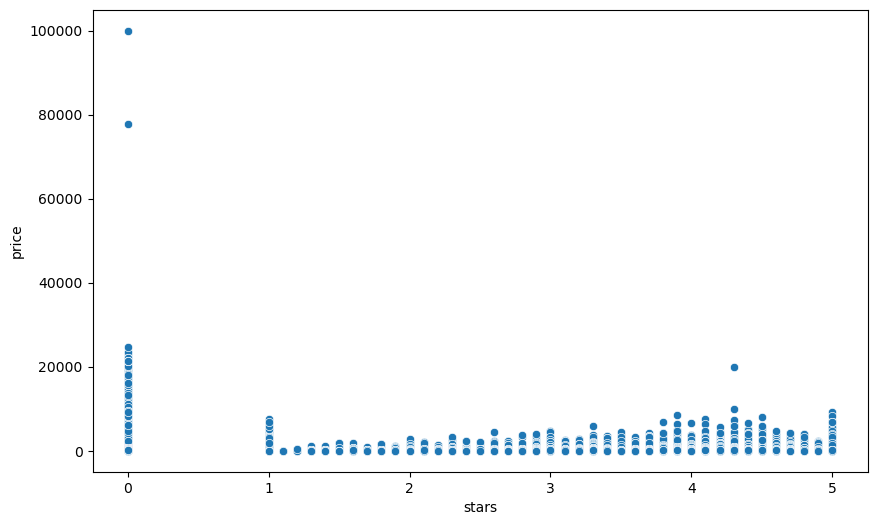

In [362]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='stars', y='price')
plt.show()

3. Use a correlation heatmap to visualize correlations between all numerical variables.

In [367]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [369]:
df_num = df[["stars","price"]]

In [ ]:

sns.heatmap(df_num, annot=True, annot_kws={"size": 7})
plt.show()